###### 5_Logistic_Regression.ipynb

## 로지스틱 회귀 (Logistic Regression)
- 로지스틱 회귀는 선형 모델을 기반으로, 예측 결과를 확률로 변환하여 분류를 수행하는 알고리즘
- 선형 회귀의 결과를 시그모이드 함수에 통과시켜 확률 값으로 변환
  - 예측값이 0 또는 1과 같이 이산적인 범주형 값일 때 사용 (ex. 합격/불합격, 스팸/정상, 등등)

In [3]:
import numpy as np

# 입력 데이터 (시험 점수)
x = np.array([[10], [20], [30], [40]
              , [50], [60], [70], [80], [90]])
# 목표 데이터 (합격 여부, 0: 불합격, 1: 합격)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

print(f'x: {x.reshape(-1)}')
print(f'y: {y}')

x: [10 20 30 40 50 60 70 80 90]
y: [0 0 0 0 1 1 1 1 1]


([<matplotlib.axis.YTick at 0x205fc691490>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

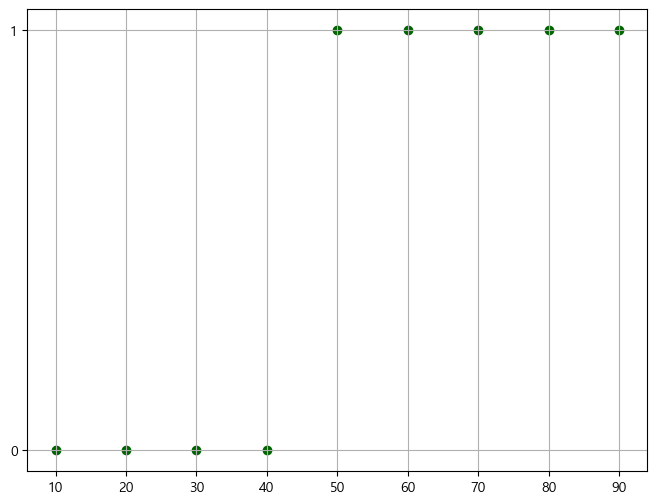

In [6]:
# 샘플 데이터 시각화 (산점도)
import matplotlib.pyplot as plt

# 한글 폰트, 마이너스 기호 깨짐 방지
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,6))

# x축 : 점수(입력데이터), y축 : 합격 여부(목표데이터. 0 또는 1)
plt.scatter(x, y, color='darkgreen')
plt.grid(True)
plt.yticks([0, 1])    # y축 눈금 설정( 0, 1 )

In [14]:
# LogisticRegression 모델
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression()

# 학습 
model.fit(x, y)
# * 회귀계수(기울기), 절편 확인
print(f'기울기 : {model.coef_[0,0]:.2f}')
print(f'절편 : {model.intercept_[0]:.2f}')

기울기 : 0.57
절편 : -25.44


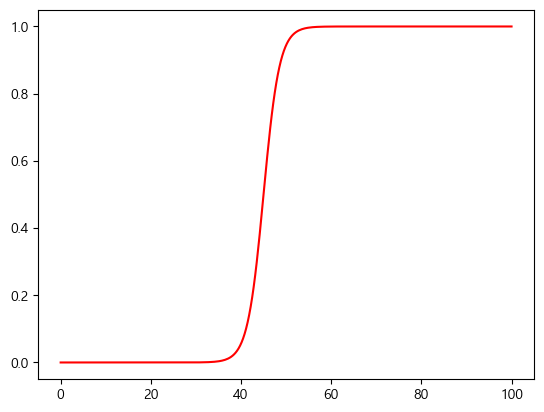

In [16]:
# 테스트용 데이터
# => 0부터 100까지 300개 나누어서 생성
x_test = np.linspace(0, 100, 300).reshape(-1, 1)

y_proba = model.predict_proba(x_test)
# predict_proba : 입력데이터(점수)에 대한 클래스별 확률을 반환
# y_proba
# [불합격확률, 합격확률]
y_proba = y_proba[:, 1]     # 합격일 확률만 선택

# 예측된 합격 확률 시각화 (시그모이드 곡선)
plt.plot(x_test, y_proba, color='red')

In [ ]:
x_test = np.array([[45], [55], [100]])
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)
for x, pred, proba in zip(x_test, y_pred, y_proba):
  # zip() => [(45, 45예측값, 확률), (55, 55예측값, 확률), (100, 100예측값, 확률)]
  print(f'점수: {x} , 예측결과: {pred}, 확률: {proba}')

점수: [45] , 예측결과: 1, 확률: [0.49998162 0.50001838]
점수: [55] , 예측결과: 1, 확률: [0.00349405 0.99650595]
점수: [100] , 예측결과: 1, 확률: [3.13082893e-14 1.00000000e+00]
